In [ ]:
# Thư viện
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import paths
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
#Lưu file
path = "/content/save_weight"
os.mkdir(path)

In [ ]:
!pip install GitPython
from git import Repo

In [ ]:
# Ket noi vs data
filepath = 'human_face'
Repo.clone_from('https://github.com/nam101nam/TTNT_Team_4', filepath)

GitCommandError: Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v -- https://github.com/nam101nam/TTNT_Team_4 human_face
  stderr: 'fatal: destination path 'human_face' already exists and is not an empty directory.
'

In [ ]:
base_dir = '/content/human_face/HumanVision/Data/HumanVisionData'
train_data = os.path.join(base_dir, 'train')
valid_data = os.path.join(base_dir, 'validation')
test_data = os.path.join(base_dir, 'test')

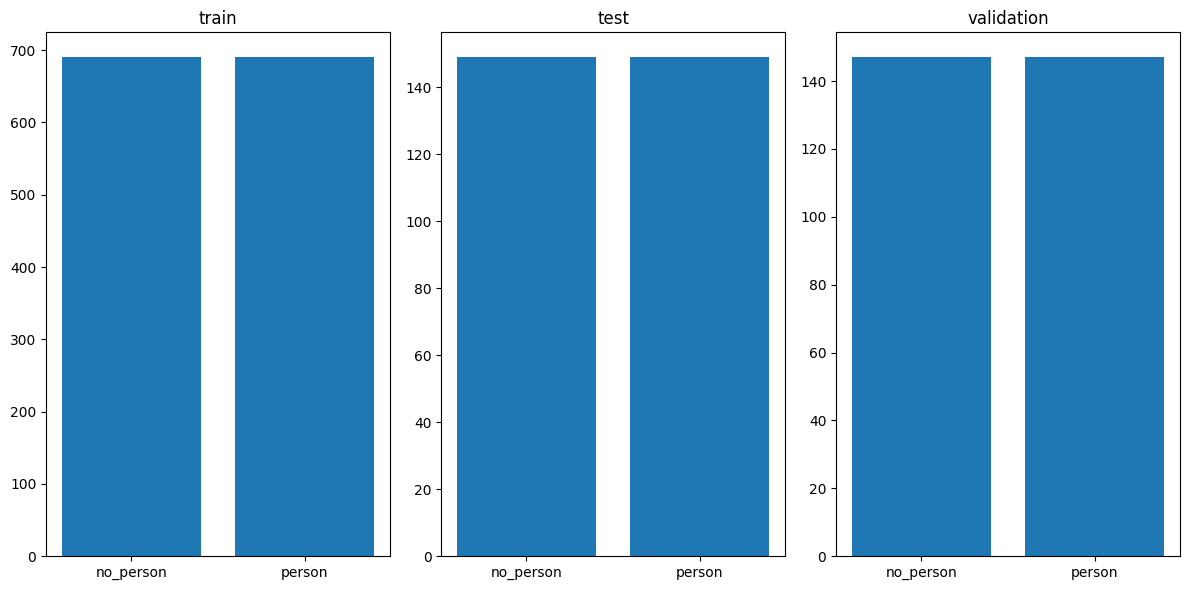

In [ ]:
def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()

show_labels(base_dir)

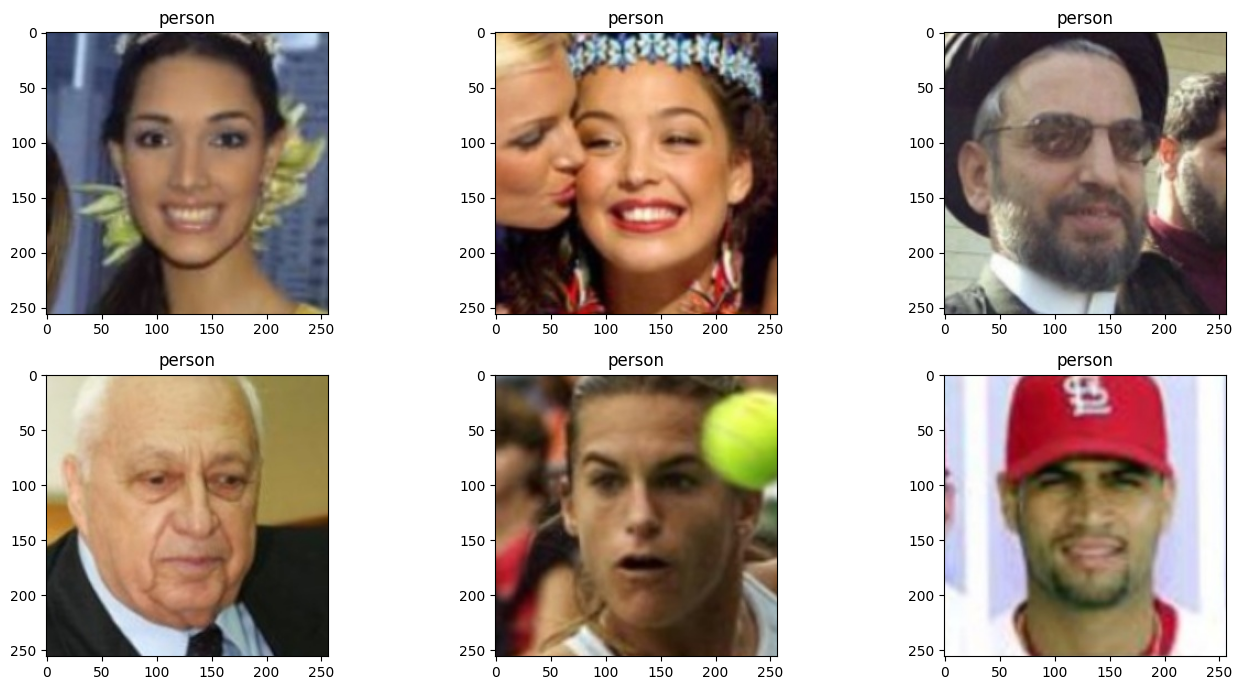

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(label)
    plt.tight_layout()
    plt.show()

plot_images(train_data, label="person")

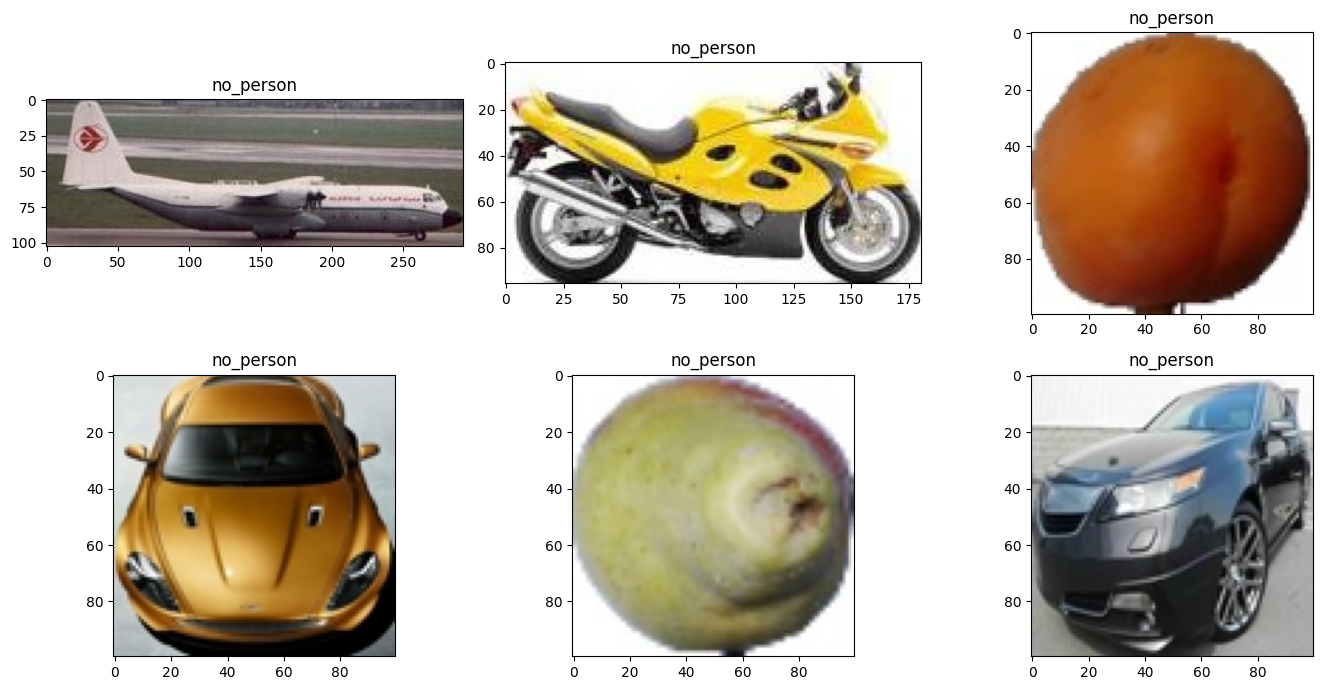

In [ ]:
plot_images(train_data, label="no_person")

In [ ]:
img_size = 150 # img.shape[0] = 227
output_size = 1 #Use sigmoid function
batch_size = 256

train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_data,
                                                     class_mode='binary',
                                                     batch_size=batch_size,
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_data,
                                         class_mode='binary',
                                         batch_size=batch_size,
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_data,
                                           class_mode='binary',
                                           batch_size=batch_size,
                                           target_size=(img_size, img_size))

Found 1380 images belonging to 2 classes.
Found 294 images belonging to 2 classes.
Found 298 images belonging to 2 classes.


In [ ]:

lenet_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 3)),

    # S2: Average Pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=2),

    # C3: Conv layer with 16 filters, kernel size 5x5
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),

    # S4: Average Pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), strides=2),

    # Flatten before going into dense layers
    tf.keras.layers.Flatten(),

    # C5: Fully connected layer with 120 units
    tf.keras.layers.Dense(units=120, activation='relu'),

    # F6: Fully connected layer with 84 units
    tf.keras.layers.Dense(units=84, activation='relu'),

    # Output layer: 1 unit (e.g., for binary classification)
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # or 'softmax' for multi-class
])

lenet_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,761 (8.52 MB)

 Trainable params: 2,232,761 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lenet_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
lenet_model.summary()

num_epochs = 10

checkpoint_path = "/content/save_weight/human_prediction(2)_.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                        epochs = num_epochs,
                        validation_data = valid_dataloader,
                        callbacks=[model_checkpoint, learning_rate_reduction])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,232,761 (8.52 MB)

 Trainable params: 2,232,761 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8856 - loss: 0.3107
Epoch 1: val_accuracy improved from -inf to 0.82313, saving model to /content/save_weight/human_prediction(2)_.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.8848 - loss: 0.3118 - val_accuracy: 0.8231 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8769 - loss: 0.2919
Epoch 2: val_accuracy improved from 0.82313 to 0.95578, saving model to /content/save_weight/human_prediction(2)_.weights.h5
6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - accuracy: 0.8773 - loss: 0.2904 - val_accuracy: 0.9558 - val_loss: 0.1661 - learning_rate: 0.0010
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9148 - loss: 0.2202
Epoch 3: val_accuracy did not improve from 0.95578
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.9140 - loss: 0.2208 - val_accuracy: 0.9320 - val_loss: 0.1921 - learning_rate: 0.0010
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step -

Để lưu trữ mô hình vĩnh viễn, bạn có thể lưu nó vào Google Drive. Đầu tiên, chúng ta sẽ kết nối với Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Sau khi kết nối Drive, bạn có thể lưu mô hình vào một thư mục trên Drive của mình. Ví dụ, chúng ta có thể lưu file `.h5` vào thư mục `My Drive/Colab Notebooks/saved_models`.

In [ ]:
import os
import shutil

drive_path = '/content/drive/MyDrive/Colab Notebooks/saved_models'

# Tạo thư mục nếu nó chưa tồn tại
os.makedirs(drive_path, exist_ok=True)

# Đường dẫn đầy đủ để lưu mô hình trên Drive
saved_model_drive_path = os.path.join(drive_path, 'human_prediction(2)_.weights.h5')

# Sao chép mô hình đã lưu từ thư mục tạm thời sang Google Drive
shutil.copy(checkpoint_path, saved_model_drive_path)

print(f"Mô hình đã được lưu thành công vào Google Drive tại: {saved_model_drive_path}")

Mô hình đã được lưu thành công vào Google Drive tại: /content/drive/MyDrive/Colab Notebooks/saved_models/human_prediction(2)_.weights.h5


In [ ]:
from tensorflow.keras.models import load_model

# Thay đường dẫn tới file .h5 của bạn
model_path = '/content/save_weight/human_prediction(2)_.weights.h5' # Corrected path to match the saved checkpoint

# Because save_weights_only=True was used, we need to first define the model architecture
# The model architecture is already defined in cell -wWQB0yWZATI
# So we just need to load the weights into the existing lenet_model
lenet_model.load_weights(model_path)

print("Mô hình đã được tải trọng số thành công.")
lenet_model.summary()

Mô hình đã được tải trọng số thành công.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 73, 73, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 34, 34, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     2,219,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,698,285 (25.55 MB)

 Trainable params: 2,232,761 (8.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,465,524 (17.03 MB)